# Thompson Sampling

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [107]:
import random
N = 500#dataset.shape[0]
d = dataset.shape[1]
ads_selected = []
nums_selected = [0] * d
nums_unselected = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    best_draw = 0
    for i in range(0,d):
        rand_draw = random.betavariate(nums_selected[i] + 1, nums_unselected[i] + 1)
        if rand_draw > best_draw:
            best_draw=rand_draw
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward:
        nums_selected[ad] += 1
    else:
        nums_unselected[ad] += 1
    total_reward += reward

In [6]:
dataset.shape

(10000, 10)

## Visualising the results - Histogram

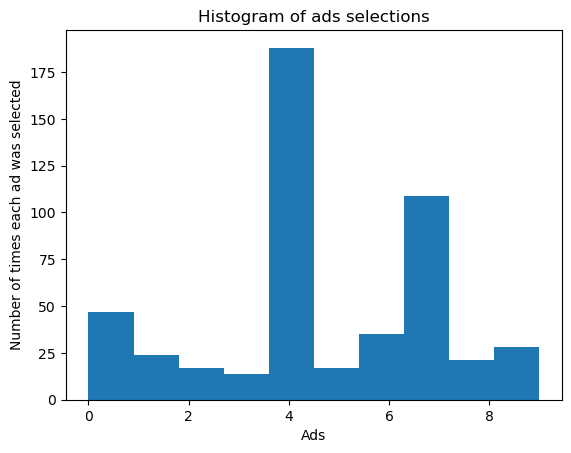

In [109]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()